In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
menData = pd.read_csv('./data/men.csv',  encoding='utf-8')

In [4]:
menData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소)
0,전국,합계,"100,448.26","53,090,684","3,491"
1,서울,소계,605.24,"9,993,743",424
2,서울,종로구,23.91,"161,869",17
3,서울,중구,9.96,"136,488",15
4,서울,용산구,21.87,"245,185",16
...,...,...,...,...,...
243,경남,거창군,803.31,"62,726",12
244,경남,합천군,983.51,"45,204",17
245,제주,소계,"1,850.23","696,657",43
246,제주,제주시,978.67,"505,950",26


In [5]:
garbageData = pd.read_csv('./data/쓰레기발생량.csv',  encoding='utf-8')

In [6]:
garbageData

,시도,시군구,발생량
0,전국,합계,"45,912.1"
1,서울,소계,"8,658.0"
2,서울,종로구,320.1
3,서울,중구,340.9
4,서울,용산구,285.0
...,...,...,...
243,경남,거창군,97.3
244,경남,합천군,42.5
245,제주,소계,959.2
246,제주,제주시,697.6


In [7]:
totalData=menData
totalData['2019발생량(t)']=garbageData['발생량']

In [8]:
totalData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t)
0,전국,합계,"100,448.26","53,090,684","3,491","45,912.1"
1,서울,소계,605.24,"9,993,743",424,"8,658.0"
2,서울,종로구,23.91,"161,869",17,320.1
3,서울,중구,9.96,"136,488",15,340.9
4,서울,용산구,21.87,"245,185",16,285.0
...,...,...,...,...,...,...
243,경남,거창군,803.31,"62,726",12,97.3
244,경남,합천군,983.51,"45,204",17,42.5
245,제주,소계,"1,850.23","696,657",43,959.2
246,제주,제주시,978.67,"505,950",26,697.6


In [9]:
len(totalData['시도'].unique())

18

In [10]:
totalData['시도'].value_counts()

경기    32
서울    26
경북    24
전남    23
경남    19
강원    19
부산    17
충남    16
전북    15
인천    12
충북    12
대구     9
광주     6
대전     6
울산     6
제주     3
세종     2
전국     1
Name: 시도, dtype: int64

In [11]:
pd.set_option('display.max_rows',10000)

In [12]:
totalData.loc[(totalData['시군구']=='합계')|(totalData['시군구']=='소계')]

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t)
0,전국,합계,"100,448.26","53,090,684","3,491","45,912.1"
1,서울,소계,605.24,"9,993,743",424,"8,658.0"
27,부산,소계,770.02,"3,459,840",206,"2,951.0"
44,대구,소계,883.49,"2,468,222",139,"2,567.9"
53,인천,소계,"1,063.27","3,029,285",154,"1,913.8"
65,광주,소계,501.14,"1,480,293",95,"1,160.2"
71,대전,소계,539.63,"1,493,979",79,"1,286.7"
77,울산,소계,"1,062.04","1,168,469",56,"1,267.5"
83,세종,소계,464.95,"346,275",19,325.3
85,경기,소계,"10,192.52","13,653,984",543,"9,543.9"


In [13]:
totalData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t)
0,전국,합계,"100,448.26","53,090,684","3,491","45,912.1"
1,서울,소계,605.24,"9,993,743",424,"8,658.0"
2,서울,종로구,23.91,"161,869",17,320.1
3,서울,중구,9.96,"136,488",15,340.9
4,서울,용산구,21.87,"245,185",16,285.0
5,서울,성동구,16.86,"308,979",17,249.9
6,서울,광진구,17.06,"366,972",15,299.4
7,서울,동대문구,14.22,"363,023",14,395.9
8,서울,중랑구,18.5,"402,024",16,319.4
9,서울,성북구,24.57,"454,744",20,327.0


In [14]:
vinylData = pd.read_csv('./data/봉투가격.csv',  encoding='utf-8')
vinylData

,시도,시군구,1ℓ가격,1.5ℓ가격,2ℓ가격,2.5ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,60ℓ가격,75ℓ가격,100ℓ가격,120ℓ가격,125ℓ가격
0,강원,고성군,0.00,0.00,30.00,0.00,40.00,130.00,130.00,250.00,0.00,610.00,0.00,0.00,1205.00,0.00,0.00
1,강원,동해시,0.00,0.00,0.00,0.00,0.00,150.00,290.00,560.00,0.00,1350.00,0.00,0.00,2700.00,0.00,0.00
2,강원,삼척시,0.00,0.00,0.00,0.00,16.67,26.67,100.00,290.00,0.00,236.67,0.00,0.00,470.00,0.00,0.00
3,강원,속초시,16.67,0.00,0.00,0.00,26.67,66.67,200.00,400.00,183.33,316.67,0.00,466.67,633.33,0.00,0.00
4,강원,양구군,0.00,0.00,0.00,0.00,70.00,120.00,210.00,400.00,0.00,950.00,0.00,0.00,1850.00,0.00,0.00
5,강원,양양군,0.00,0.00,13.33,0.00,20.00,60.00,113.33,340.00,166.67,276.67,0.00,410.00,543.33,0.00,0.00
6,강원,영월군,0.00,0.00,0.00,0.00,0.00,70.00,120.00,230.00,0.00,600.00,0.00,0.00,1200.00,0.00,0.00
7,강원,원주시,0.00,0.00,26.67,0.00,66.67,170.00,320.00,680.00,0.00,1126.67,0.00,833.33,0.00,0.00,0.00
8,강원,인제군,0.00,0.00,40.00,0.00,60.00,90.00,150.00,300.00,0.00,740.00,0.00,0.00,1470.00,1700.00,0.00
9,강원,정선군,0.00,0.00,13.33,0.00,16.67,26.67,150.00,280.00,430.00,700.00,0.00,0.00,920.00,0.00,0.00


In [15]:
#모든 시군구에 표준이 없거나 너무 적은 봉투 column 제거
vinylData=vinylData.drop(['1.5ℓ가격','2.5ℓ가격','60ℓ가격','120ℓ가격','125ℓ가격'],axis='columns')
vinylData

,시도,시군구,1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
0,강원,고성군,0.00,30.00,40.00,130.00,130.00,250.00,0.00,610.00,0.00,1205.00
1,강원,동해시,0.00,0.00,0.00,150.00,290.00,560.00,0.00,1350.00,0.00,2700.00
2,강원,삼척시,0.00,0.00,16.67,26.67,100.00,290.00,0.00,236.67,0.00,470.00
3,강원,속초시,16.67,0.00,26.67,66.67,200.00,400.00,183.33,316.67,466.67,633.33
4,강원,양구군,0.00,0.00,70.00,120.00,210.00,400.00,0.00,950.00,0.00,1850.00
5,강원,양양군,0.00,13.33,20.00,60.00,113.33,340.00,166.67,276.67,410.00,543.33
6,강원,영월군,0.00,0.00,0.00,70.00,120.00,230.00,0.00,600.00,0.00,1200.00
7,강원,원주시,0.00,26.67,66.67,170.00,320.00,680.00,0.00,1126.67,833.33,0.00
8,강원,인제군,0.00,40.00,60.00,90.00,150.00,300.00,0.00,740.00,0.00,1470.00
9,강원,정선군,0.00,13.33,16.67,26.67,150.00,280.00,430.00,700.00,0.00,920.00


In [16]:
totalData=pd.merge(totalData,vinylData)
totalData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
0,서울,종로구,23.91,"161,869",17,320.1,50.00,95.00,150.00,315.00,125.00,245.00,0.00,625.00,940.00,1250.00
1,서울,중구,9.96,"136,488",15,340.9,0.00,0.00,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00
2,서울,용산구,21.87,"245,185",16,285.0,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33
3,서울,성동구,16.86,"308,979",17,249.9,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,0.00,0.00
4,서울,광진구,17.06,"366,972",15,299.4,33.33,63.33,130.00,253.33,166.67,326.67,0.00,0.00,0.00,0.00
5,서울,동대문구,14.22,"363,023",14,395.9,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,0.00
6,서울,중랑구,18.5,"402,024",16,319.4,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,0.00
7,서울,성북구,24.57,"454,744",20,327.0,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,0.00,0.00
8,서울,강북구,23.6,"317,695",13,239.9,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,0.00
9,서울,노원구,35.44,"537,303",19,296.0,0.00,0.00,90.00,130.00,250.00,490.00,0.00,1250.00,1880.00,2500.00


In [17]:
#예산 csv 불러오기 
budgetData = pd.read_csv('./data/예산.csv',  encoding='utf-8')




#totalData에 Merge 시키기 
totalData=pd.merge(totalData,budgetData)
totalData


,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격,총계
0,서울,종로구,23.91,"161,869",17,320.1,50.00,95.00,150.00,315.00,125.00,245.00,0.00,625.00,940.00,1250.00,27159409
1,서울,중구,9.96,"136,488",15,340.9,0.00,0.00,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00,11632733
2,서울,용산구,21.87,"245,185",16,285.0,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33,32825500
3,서울,성동구,16.86,"308,979",17,249.9,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,0.00,0.00,39250924
4,서울,광진구,17.06,"366,972",15,299.4,33.33,63.33,130.00,253.33,166.67,326.67,0.00,0.00,0.00,0.00,36459252
5,서울,동대문구,14.22,"363,023",14,395.9,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,0.00,30637744
6,서울,중랑구,18.5,"402,024",16,319.4,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,0.00,30759407
7,서울,성북구,24.57,"454,744",20,327.0,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,0.00,0.00,9546000
8,서울,강북구,23.6,"317,695",13,239.9,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,0.00,31733532
9,서울,노원구,35.44,"537,303",19,296.0,0.00,0.00,90.00,130.00,250.00,490.00,0.00,1250.00,1880.00,2500.00,9091984


In [18]:
budgetData

,시도,시군구,총계
0,강원,강릉시,45783500
1,강원,강원도,0
2,강원,고성군,8912292
3,강원,동해시,18777283
4,강원,삼척시,11424353
5,강원,소계,248488578
6,강원,속초시,6325859
7,강원,양구군,4874313
8,강원,양양군,8605603
9,강원,영월군,6075602


In [19]:
tColumns=totalData.columns
tColumns

Index(['시도', '시군구', '면적(㎢)', '인구(명)', '동(읍·면)수(개소)', '2019발생량(t)', '1ℓ가격',
       '2ℓ가격', '3ℓ가격', '5ℓ가격', '10ℓ가격', '20ℓ가격', '30ℓ가격', '50ℓ가격', '75ℓ가격',
       '100ℓ가격', '총계'],
      dtype='object')

In [20]:
type(totalData['동(읍·면)수(개소)'][0])

str

In [21]:
#정규식을 활용하여 컬럼명을 입력받으면 해당 컬럼명에서 특수문자를 제거해주는 함수
def removeSC(colmns):
    if(type(totalData[colmns][0])==str):
        totalData[colmns]=totalData[colmns].str.replace(pat=r'[,]',repl=r'',regex=True)

In [22]:
for column in tColumns:
    removeSC(column)

In [23]:
totalData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격,총계
0,서울,종로구,23.91,161869,17,320.1,50.00,95.00,150.00,315.00,125.00,245.00,0.00,625.00,940.00,1250.00,27159409
1,서울,중구,9.96,136488,15,340.9,0.00,0.00,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00,11632733
2,서울,용산구,21.87,245185,16,285.0,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33,32825500
3,서울,성동구,16.86,308979,17,249.9,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,0.00,0.00,39250924
4,서울,광진구,17.06,366972,15,299.4,33.33,63.33,130.00,253.33,166.67,326.67,0.00,0.00,0.00,0.00,36459252
5,서울,동대문구,14.22,363023,14,395.9,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,0.00,30637744
6,서울,중랑구,18.5,402024,16,319.4,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,0.00,30759407
7,서울,성북구,24.57,454744,20,327.0,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,0.00,0.00,9546000
8,서울,강북구,23.6,317695,13,239.9,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,0.00,31733532
9,서울,노원구,35.44,537303,19,296.0,0.00,0.00,90.00,130.00,250.00,490.00,0.00,1250.00,1880.00,2500.00,9091984


In [24]:
type(totalData['면적(㎢)'][0])

str

In [25]:
#입력받은 데이터가 숫자인지 판단하는 함수
def isNumber(s):
  try:
    float(s)
    return True
  except ValueError:
    return False

In [26]:
isNumber('25.4')

True

In [27]:
#입력받은 데이터가 숫자인지 판단하여 형변환 해주는 함수
def StrToNum(data):
    if(isNumber(data)):
        return pd.to_numeric(data)
    else:
        return data

In [28]:
#컬럼명과 함수를 입력받으면 해당컬럼에 함수를 적용하는 함수
def applyColumn(column,function):
    totalData[column]=totalData[column].apply(function)

In [29]:
for column in tColumns:
    applyColumn(column,StrToNum)

In [30]:
#mean,sum등을 구하기위해 0인값을 nan으로 변경
for column in tColumns:
    totalData[column]=totalData[column].apply(lambda x : None if(x==0) else x)

In [31]:
totalData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격,총계
0,서울,종로구,23.91,161869,17,320.10,50.00,95.00,150.00,315.00,125.00,245.00,NaN,625.00,940.00,1250.00,27159409
1,서울,중구,9.96,136488,15,340.90,NaN,NaN,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00,11632733
2,서울,용산구,21.87,245185,16,285.00,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33,32825500
3,서울,성동구,16.86,308979,17,249.90,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,NaN,NaN,39250924
4,서울,광진구,17.06,366972,15,299.40,33.33,63.33,130.00,253.33,166.67,326.67,NaN,NaN,NaN,NaN,36459252
5,서울,동대문구,14.22,363023,14,395.90,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,NaN,30637744
6,서울,중랑구,18.50,402024,16,319.40,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,NaN,30759407
7,서울,성북구,24.57,454744,20,327.00,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,NaN,NaN,9546000
8,서울,강북구,23.60,317695,13,239.90,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,NaN,31733532
9,서울,노원구,35.44,537303,19,296.00,NaN,NaN,90.00,130.00,250.00,490.00,NaN,1250.00,1880.00,2500.00,9091984


In [32]:
type(totalData['면적(㎢)'][0])

numpy.float64

In [33]:
type(totalData['2019발생량(t)'][0])

numpy.float64

In [34]:
totalData['1인당발생량(kg)']=(totalData['2019발생량(t)']/totalData['인구(명)'])*1000
totalData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격,총계,1인당발생량(kg)
0,서울,종로구,23.91,161869,17,320.10,50.00,95.00,150.00,315.00,125.00,245.00,NaN,625.00,940.00,1250.00,27159409,1.98
1,서울,중구,9.96,136488,15,340.90,NaN,NaN,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00,11632733,2.50
2,서울,용산구,21.87,245185,16,285.00,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33,32825500,1.16
3,서울,성동구,16.86,308979,17,249.90,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,NaN,NaN,39250924,0.81
4,서울,광진구,17.06,366972,15,299.40,33.33,63.33,130.00,253.33,166.67,326.67,NaN,NaN,NaN,NaN,36459252,0.82
5,서울,동대문구,14.22,363023,14,395.90,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,NaN,30637744,1.09
6,서울,중랑구,18.50,402024,16,319.40,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,NaN,30759407,0.79
7,서울,성북구,24.57,454744,20,327.00,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,NaN,NaN,9546000,0.72
8,서울,강북구,23.60,317695,13,239.90,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,NaN,31733532,0.76
9,서울,노원구,35.44,537303,19,296.00,NaN,NaN,90.00,130.00,250.00,490.00,NaN,1250.00,1880.00,2500.00,9091984,0.55


In [35]:
totalData['인구밀집도(인구/㎢)']=totalData['인구(명)']/totalData['면적(㎢)']
totalData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격,총계,1인당발생량(kg),인구밀집도(인구/㎢)
0,서울,종로구,23.91,161869,17,320.10,50.00,95.00,150.00,315.00,125.00,245.00,NaN,625.00,940.00,1250.00,27159409,1.98,6769.93
1,서울,중구,9.96,136488,15,340.90,NaN,NaN,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00,11632733,2.50,13703.61
2,서울,용산구,21.87,245185,16,285.00,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33,32825500,1.16,11211.02
3,서울,성동구,16.86,308979,17,249.90,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,NaN,NaN,39250924,0.81,18326.16
4,서울,광진구,17.06,366972,15,299.40,33.33,63.33,130.00,253.33,166.67,326.67,NaN,NaN,NaN,NaN,36459252,0.82,21510.67
5,서울,동대문구,14.22,363023,14,395.90,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,NaN,30637744,1.09,25529.04
6,서울,중랑구,18.50,402024,16,319.40,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,NaN,30759407,0.79,21731.03
7,서울,성북구,24.57,454744,20,327.00,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,NaN,NaN,9546000,0.72,18508.10
8,서울,강북구,23.60,317695,13,239.90,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,NaN,31733532,0.76,13461.65
9,서울,노원구,35.44,537303,19,296.00,NaN,NaN,90.00,130.00,250.00,490.00,NaN,1250.00,1880.00,2500.00,9091984,0.55,15160.92


In [36]:
#list의 slice를 이용하여 column순서 변경
col1=totalData.columns[-3:].to_list()#중간으로 넣을 컬럼 추출
print('추출한 컬럼',col1)
col2=totalData.columns[:6].to_list()#앞에올 column
print('앞에올 컬럼',col2)
col3=totalData.columns[6:-3].to_list()#다시 뒤에 붙일 컬럼
print('뒤에 붙일 컬럼 ',col3)
new_col=col2+col1+col3
print('바뀐 컬럼순서',new_col)
totalData=totalData[new_col]

추출한 컬럼 ['총계', '1인당발생량(kg)', '인구밀집도(인구/㎢)']
앞에올 컬럼 ['시도', '시군구', '면적(㎢)', '인구(명)', '동(읍·면)수(개소)', '2019발생량(t)']
뒤에 붙일 컬럼  ['1ℓ가격', '2ℓ가격', '3ℓ가격', '5ℓ가격', '10ℓ가격', '20ℓ가격', '30ℓ가격', '50ℓ가격', '75ℓ가격', '100ℓ가격']
바뀐 컬럼순서 ['시도', '시군구', '면적(㎢)', '인구(명)', '동(읍·면)수(개소)', '2019발생량(t)', '총계', '1인당발생량(kg)', '인구밀집도(인구/㎢)', '1ℓ가격', '2ℓ가격', '3ℓ가격', '5ℓ가격', '10ℓ가격', '20ℓ가격', '30ℓ가격', '50ℓ가격', '75ℓ가격', '100ℓ가격']


In [37]:
totalData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),총계,1인당발생량(kg),인구밀집도(인구/㎢),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
0,서울,종로구,23.91,161869,17,320.10,27159409,1.98,6769.93,50.00,95.00,150.00,315.00,125.00,245.00,NaN,625.00,940.00,1250.00
1,서울,중구,9.96,136488,15,340.90,11632733,2.50,13703.61,NaN,NaN,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00
2,서울,용산구,21.87,245185,16,285.00,32825500,1.16,11211.02,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33
3,서울,성동구,16.86,308979,17,249.90,39250924,0.81,18326.16,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,NaN,NaN
4,서울,광진구,17.06,366972,15,299.40,36459252,0.82,21510.67,33.33,63.33,130.00,253.33,166.67,326.67,NaN,NaN,NaN,NaN
5,서울,동대문구,14.22,363023,14,395.90,30637744,1.09,25529.04,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,NaN
6,서울,중랑구,18.50,402024,16,319.40,30759407,0.79,21731.03,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,NaN
7,서울,성북구,24.57,454744,20,327.00,9546000,0.72,18508.10,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,NaN,NaN
8,서울,강북구,23.60,317695,13,239.90,31733532,0.76,13461.65,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,NaN
9,서울,노원구,35.44,537303,19,296.00,9091984,0.55,15160.92,NaN,NaN,90.00,130.00,250.00,490.00,NaN,1250.00,1880.00,2500.00


In [38]:
sidoName=totalData['시도'].unique()
sidoName

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [39]:
seoulData=totalData.loc[totalData['시도']=='서울']
seoulData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),총계,1인당발생량(kg),인구밀집도(인구/㎢),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
0,서울,종로구,23.91,161869,17,320.10,27159409,1.98,6769.93,50.00,95.00,150.00,315.00,125.00,245.00,NaN,625.00,940.00,1250.00
1,서울,중구,9.96,136488,15,340.90,11632733,2.50,13703.61,NaN,NaN,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00
2,서울,용산구,21.87,245185,16,285.00,32825500,1.16,11211.02,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33
3,서울,성동구,16.86,308979,17,249.90,39250924,0.81,18326.16,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,NaN,NaN
4,서울,광진구,17.06,366972,15,299.40,36459252,0.82,21510.67,33.33,63.33,130.00,253.33,166.67,326.67,NaN,NaN,NaN,NaN
5,서울,동대문구,14.22,363023,14,395.90,30637744,1.09,25529.04,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,NaN
6,서울,중랑구,18.50,402024,16,319.40,30759407,0.79,21731.03,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,NaN
7,서울,성북구,24.57,454744,20,327.00,9546000,0.72,18508.10,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,NaN,NaN
8,서울,강북구,23.60,317695,13,239.90,31733532,0.76,13461.65,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,NaN
9,서울,노원구,35.44,537303,19,296.00,9091984,0.55,15160.92,NaN,NaN,90.00,130.00,250.00,490.00,NaN,1250.00,1880.00,2500.00


In [40]:
busanData=totalData.loc[totalData['시도']=='부산']
daeguData=totalData.loc[totalData['시도']=='대구']
incheonData=totalData.loc[totalData['시도']=='인천']
gawngjuData=totalData.loc[totalData['시도']=='광주']
daejunData=totalData.loc[totalData['시도']=='대전']
ulsanDtaa=totalData.loc[totalData['시도']=='울산']
sejongData=totalData.loc[totalData['시도']=='세종']
kyunkidata=totalData.loc[totalData['시도']=='경기']
kangwonData=totalData.loc[totalData['시도']=='광주']
chungBookData=totalData.loc[totalData['시도']=='충북']
choungNamData=totalData.loc[totalData['시도']=='충남']
junBookData=totalData.loc[totalData['시도']=='전북']
junNamData=totalData.loc[totalData['시도']=='전남']
kyunBookData=totalData.loc[totalData['시도']=='경북']
kyunNamData=totalData.loc[totalData['시도']=='경남']
jejuData=totalData.loc[totalData['시도']=='제주']

In [41]:
sidoList=[seoulData,
busanData,
daeguData,
incheonData,
gawngjuData,
daejunData,
ulsanDtaa,
sejongData,
kyunkidata,
kangwonData,
chungBookData,
choungNamData,
junBookData,
junNamData,
kyunBookData,
kyunNamData,
jejuData]
sidoList

[    시도   시군구  면적(㎢)   인구(명)  동(읍·면)수(개소)  2019발생량(t)        총계  1인당발생량(kg)  \
 0   서울   종로구  23.91  161869           17      320.10  27159409        1.98   
 1   서울    중구   9.96  136488           15      340.90  11632733        2.50   
 2   서울   용산구  21.87  245185           16      285.00  32825500        1.16   
 3   서울   성동구  16.86  308979           17      249.90  39250924        0.81   
 4   서울   광진구  17.06  366972           15      299.40  36459252        0.82   
 5   서울  동대문구  14.22  363023           14      395.90  30637744        1.09   
 6   서울   중랑구  18.50  402024           16      319.40  30759407        0.79   
 7   서울   성북구  24.57  454744           20      327.00   9546000        0.72   
 8   서울   강북구  23.60  317695           13      239.90  31733532        0.76   
 9   서울   노원구  35.44  537303           19      296.00   9091984        0.55   
 10  서울   은평구  29.71  484546           16      344.00  12958259        0.71   
 11  서울  서대문구  17.63  323171           14      225.6

In [42]:
vinylColumn=vinylData.columns[2:]
vinylColumn

Index(['1ℓ가격', '2ℓ가격', '3ℓ가격', '5ℓ가격', '10ℓ가격', '20ℓ가격', '30ℓ가격', '50ℓ가격',
       '75ℓ가격', '100ℓ가격'],
      dtype='object')

In [43]:
totalData
totalData=totalData.rename(columns={'총계':'예산(천원)'})

In [44]:
vinylData=totalData[['시도','시군구']]
vinylData[vinylColumn]=totalData[vinylColumn]
vinylData

C:\Users\YJ\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,시도,시군구,1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
0,서울,종로구,50.00,95.00,150.00,315.00,125.00,245.00,NaN,625.00,940.00,1250.00
1,서울,중구,NaN,NaN,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00
2,서울,용산구,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33
3,서울,성동구,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,NaN,NaN
4,서울,광진구,33.33,63.33,130.00,253.33,166.67,326.67,NaN,NaN,NaN,NaN
5,서울,동대문구,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,NaN
6,서울,중랑구,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,NaN
7,서울,성북구,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,NaN,NaN
8,서울,강북구,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,NaN
9,서울,노원구,NaN,NaN,90.00,130.00,250.00,490.00,NaN,1250.00,1880.00,2500.00


In [45]:
toTalsidoData=totalData.groupby('시도').sum()
toTalsidoData

,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),예산(천원),1인당발생량(kg),인구밀집도(인구/㎢),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
시도,,,,,,,,,,,,,,,,,
강원,15834.50,1344660,172,1617.40,202705078,23.32,2555.27,26.67,208.33,489.17,1556.83,3118.33,6682.50,1213.33,10808.33,4897.50,15119.17
경기,9601.26,12575393,512,8645.80,1036099068,21.81,106380.67,406.43,541.19,1461.19,3905.36,9166.90,17725.00,5657.86,27219.76,25833.21,21205.71
경남,10540.39,3438081,308,3552.80,289067063,18.37,6352.29,0.00,0.00,453.33,1771.67,4068.33,8151.67,1758.33,17285.00,14140.00,8570.00
경북,19033.34,2719702,332,2367.10,287017538,22.63,3669.11,20.00,85.00,522.50,1907.50,4000.00,8008.33,1930.00,15620.00,8415.00,27485.00
광주,501.14,1480293,95,1160.20,90024845,3.97,17503.17,0.00,0.00,0.00,900.00,1900.00,3700.00,4440.00,7320.00,10920.00,5460.00
대구,883.49,2468222,139,2567.90,169940057,9.08,52075.02,0.00,0.00,650.00,1125.00,2175.00,4200.00,5525.00,10500.00,13520.00,20775.00
대전,444.10,1008953,56,927.70,49633221,3.71,10214.67,0.00,0.00,250.00,425.00,1320.00,2640.00,0.00,4125.00,4960.00,3300.00
부산,740.35,3099299,186,2630.00,223587651,13.43,137032.71,0.00,0.00,596.67,2398.33,5846.67,11536.67,12123.33,20370.00,30311.67,9133.33
서울,560.73,9272187,394,7908.20,663298712,21.63,402233.97,711.67,1444.67,2636.00,5053.17,8045.00,11183.67,6106.00,12166.67,15353.33,13333.33


In [46]:
sidoData=totalData.groupby('시도').mean()
sidoData

,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),예산(천원),1인당발생량(kg),인구밀집도(인구/㎢),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
시도,,,,,,,,,,,,,,,,,
강원,931.44,79097.65,10.12,95.14,11923828.12,1.37,150.31,13.33,26.04,37.63,91.58,183.43,393.09,242.67,635.78,699.64,1163.01
경기,320.04,419179.77,17.07,288.19,34536635.60,0.73,3546.02,20.32,36.08,56.20,134.67,305.56,590.83,628.65,907.33,1230.15,1514.69
경남,585.58,191004.50,17.11,197.38,16059281.28,1.02,352.90,NaN,NaN,45.33,98.43,226.02,452.87,439.58,960.28,1414.00,1428.33
경북,827.54,118247.91,14.43,102.92,12479023.39,0.98,159.53,20.00,28.33,47.50,86.70,173.91,348.19,482.50,679.13,1051.88,1374.25
광주,100.23,296058.60,19.00,232.04,18004969.00,0.79,3500.63,NaN,NaN,NaN,180.00,380.00,740.00,888.00,1464.00,2184.00,2730.00
대구,110.44,308527.75,17.38,320.99,21242507.12,1.14,6509.38,NaN,NaN,92.86,140.62,271.88,525.00,789.29,1312.50,1931.43,2596.88
대전,111.03,252238.25,14.00,231.93,12408305.25,0.93,2553.67,NaN,NaN,62.50,106.25,330.00,660.00,NaN,1031.25,1653.33,1650.00
부산,49.36,206619.93,12.40,175.33,14905843.40,0.90,9135.51,NaN,NaN,99.44,159.89,389.78,769.11,865.95,1358.00,2020.78,2283.33
서울,24.38,403138.57,17.13,343.83,28839074.43,0.94,17488.43,39.54,80.26,125.52,219.70,349.78,508.35,407.07,579.37,903.14,1333.33


### 시도별 각 봉투별 평균금액

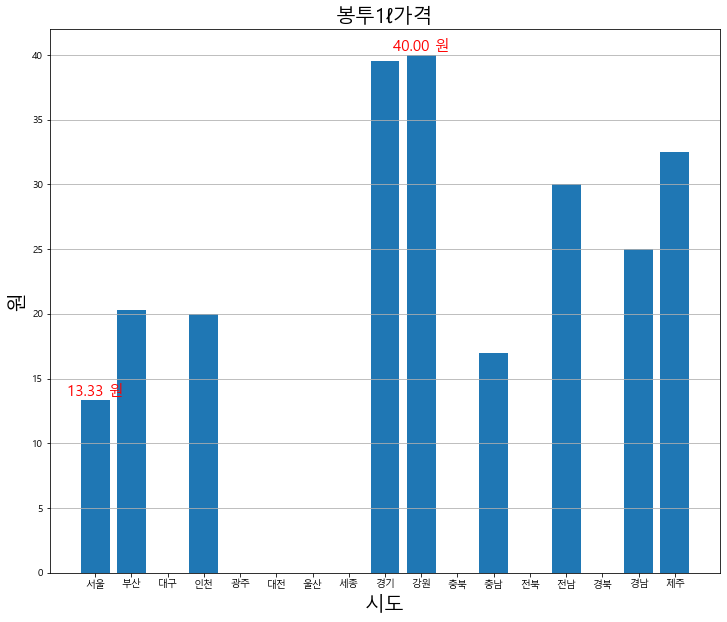

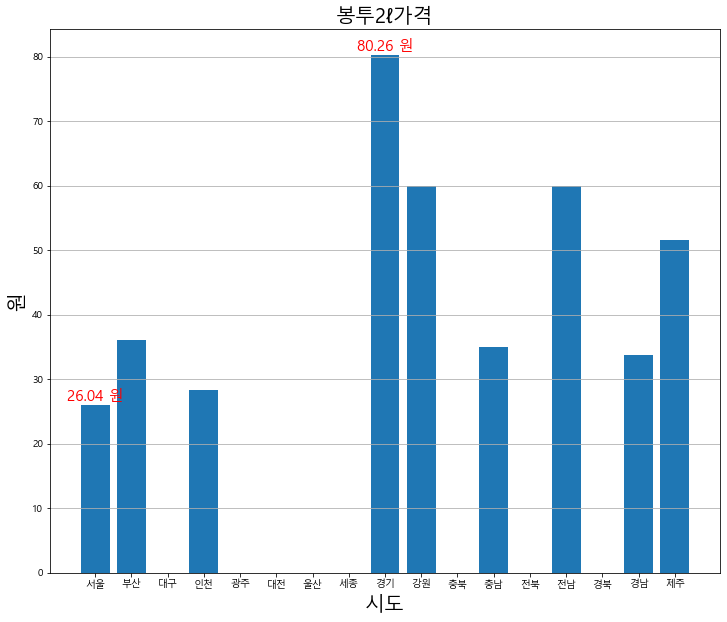

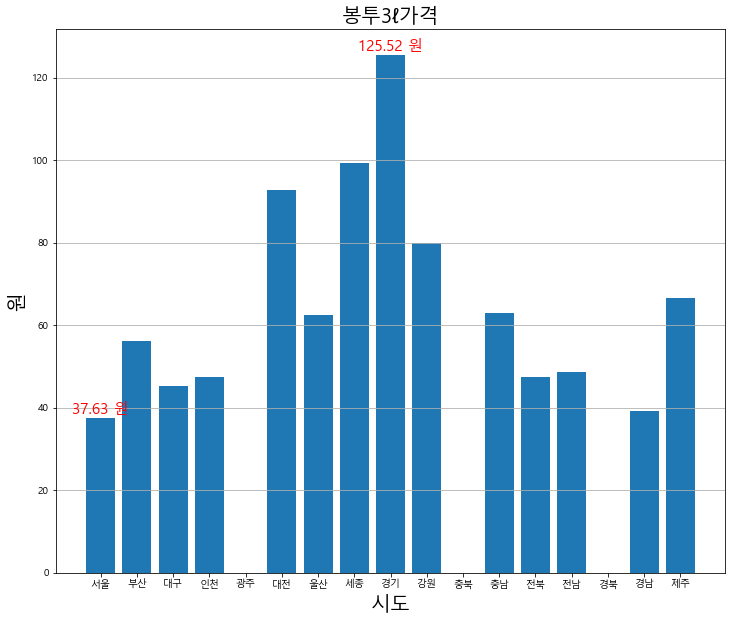

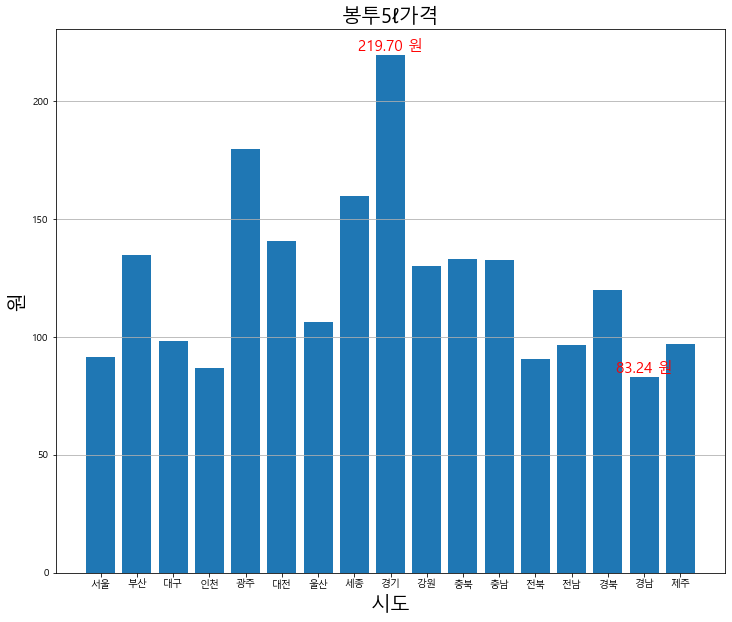

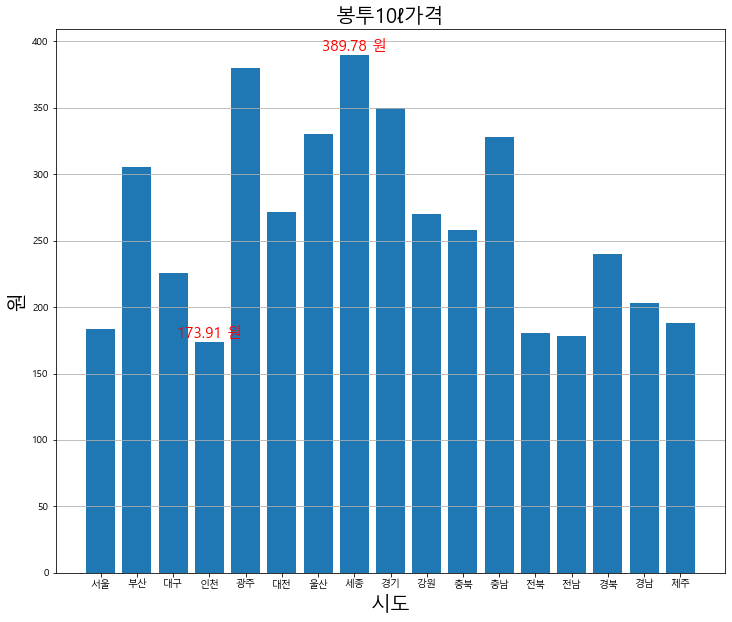

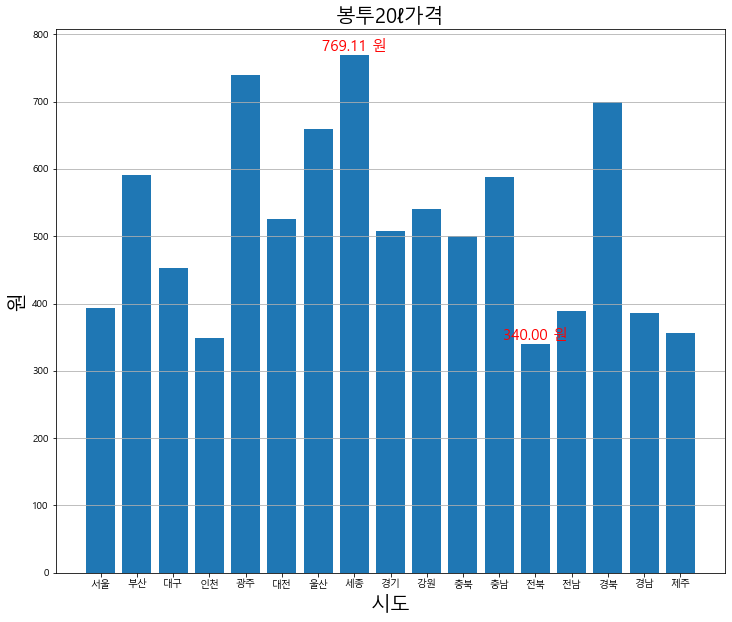

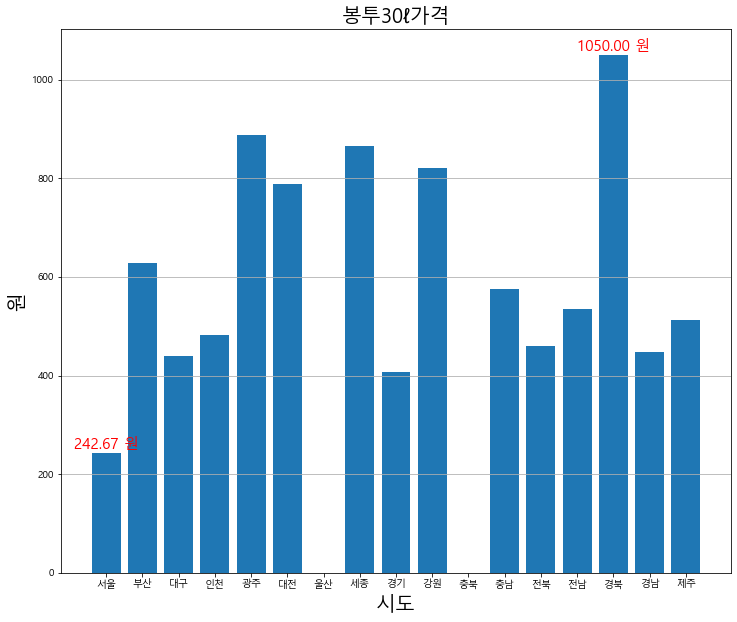

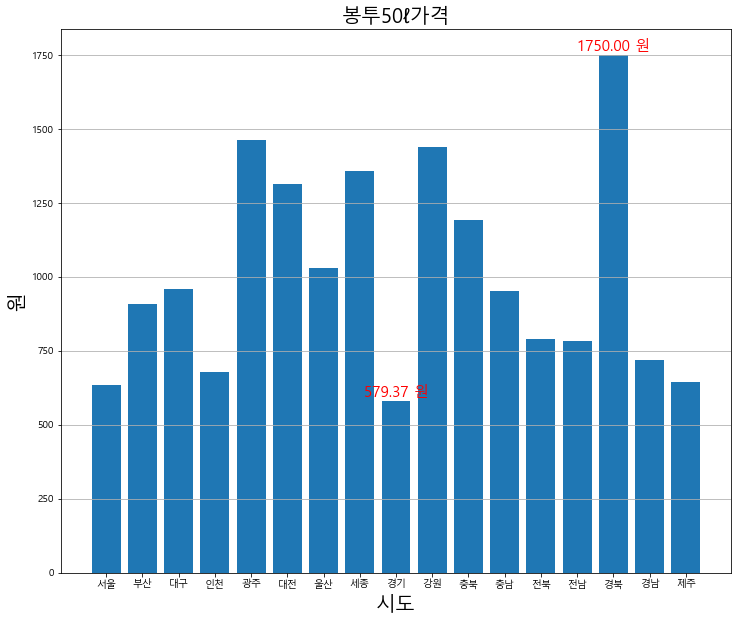

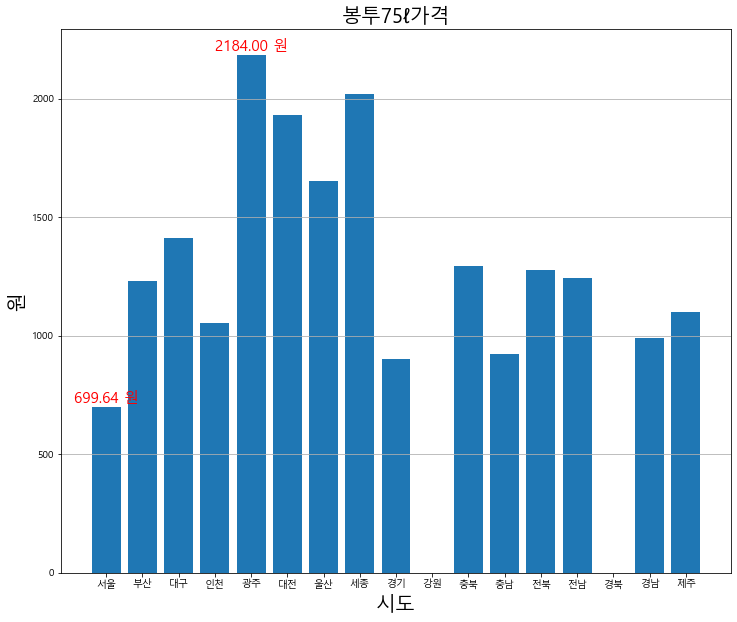

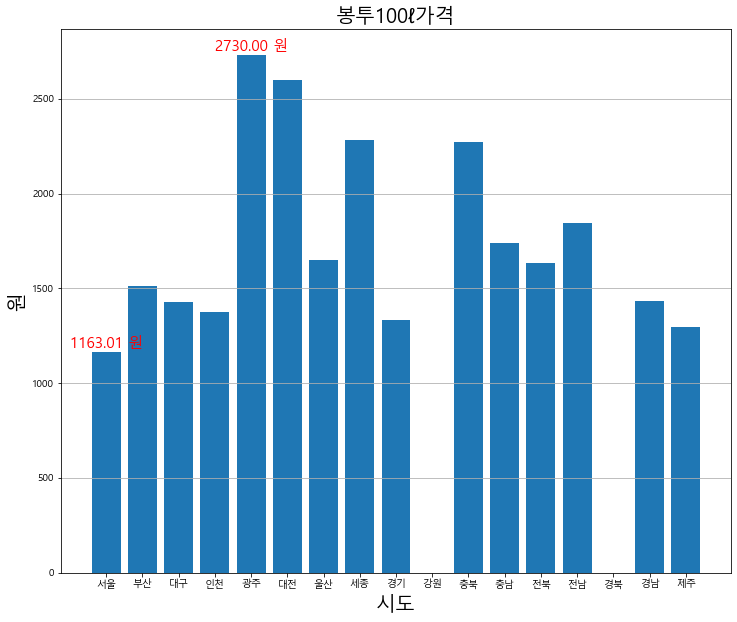

In [47]:
for column in vinylColumn:
    x=sidoName
    y=sidoData[column]
    dic={y:x for x,y in zip(x,y)}

    plt.figure(figsize=(12, 10))##캔버스 초기화
    plt.bar(x,y)
    plt.text(dic[min(y)],min(y),
             '{:.2f}'.format(min(y)) + ' 원',
             color='r',
             horizontalalignment='center',
             verticalalignment='bottom',
            fontsize=15)
    plt.text(dic[max(y)],max(y),
             '{:.2f}'.format(max(y)) + ' 원',
             color='r',
             horizontalalignment='center',
             verticalalignment='bottom',
            fontsize=15)
    plt.grid(True, axis='y')

    plt.title('봉투'+column,fontsize=20)
    plt.xlabel('시도',fontsize=20)
    plt.ylabel('원',fontsize=20)

    plt.show()

### 각 시도 시군구별 봉투금액

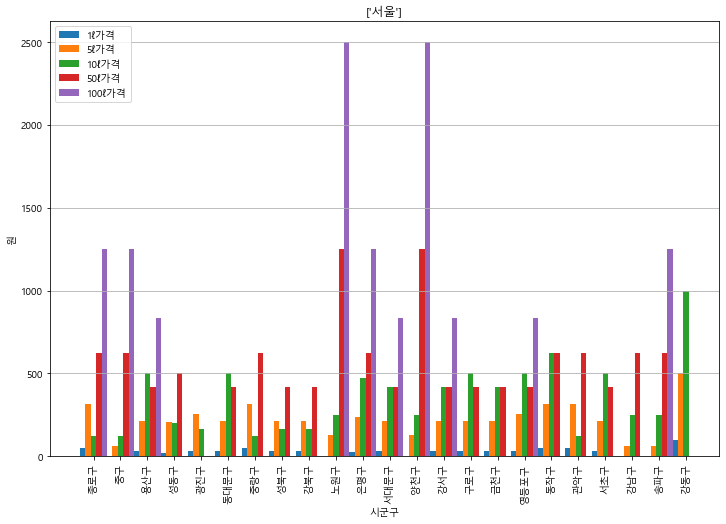

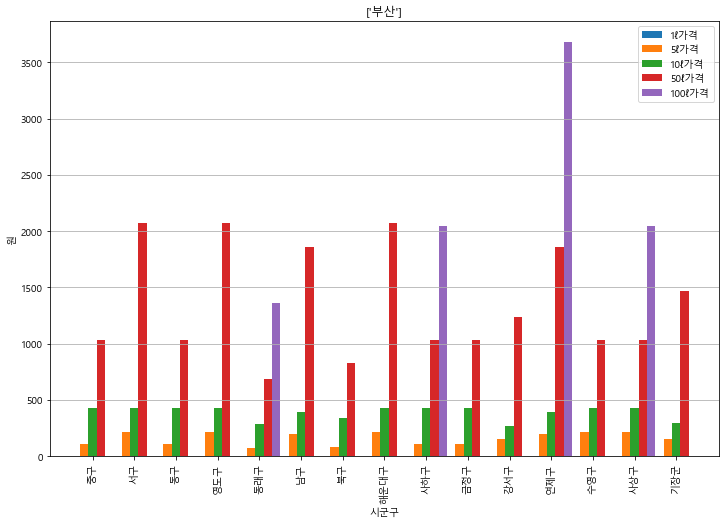

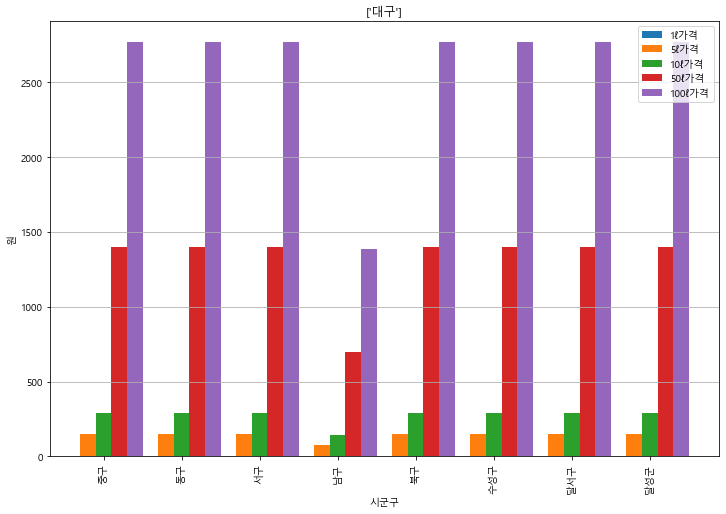

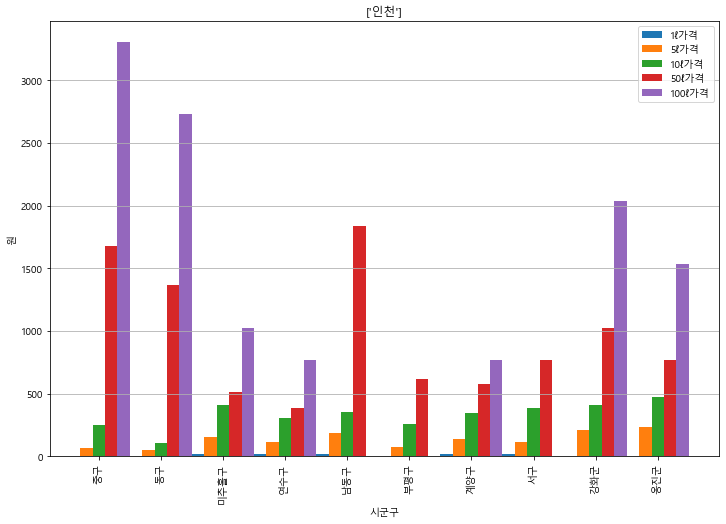

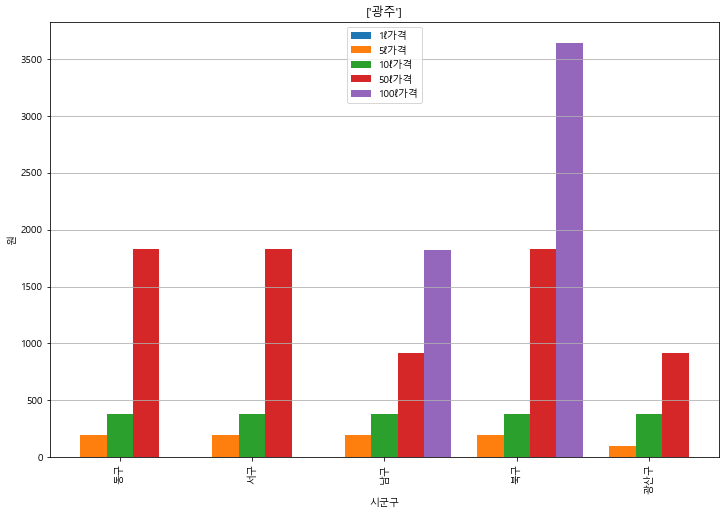

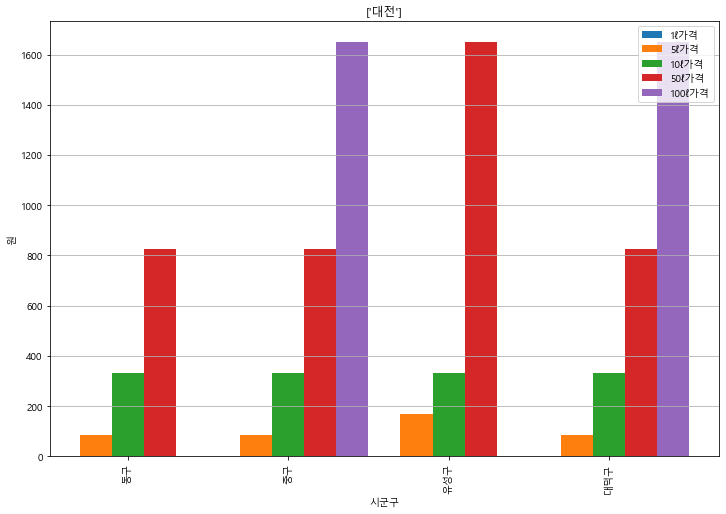

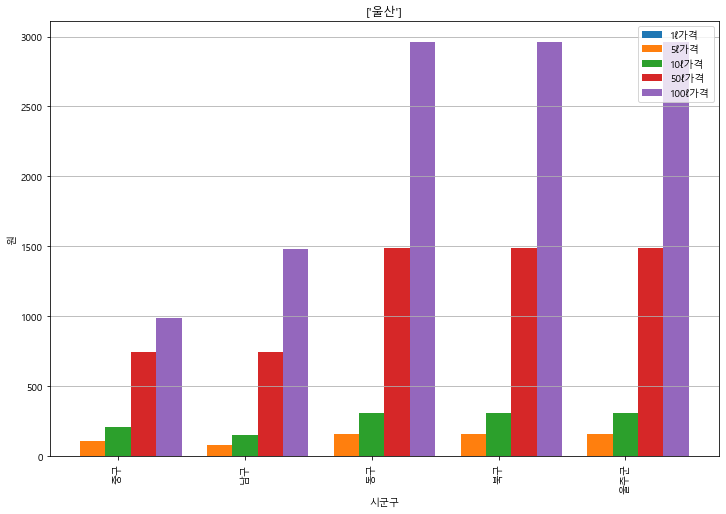

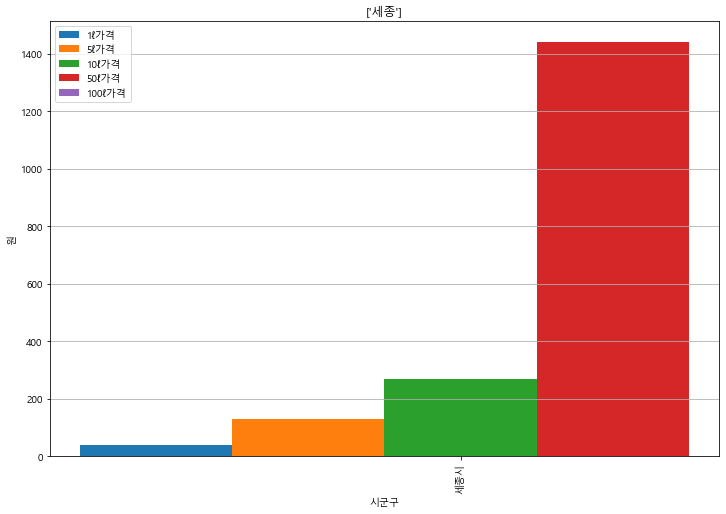

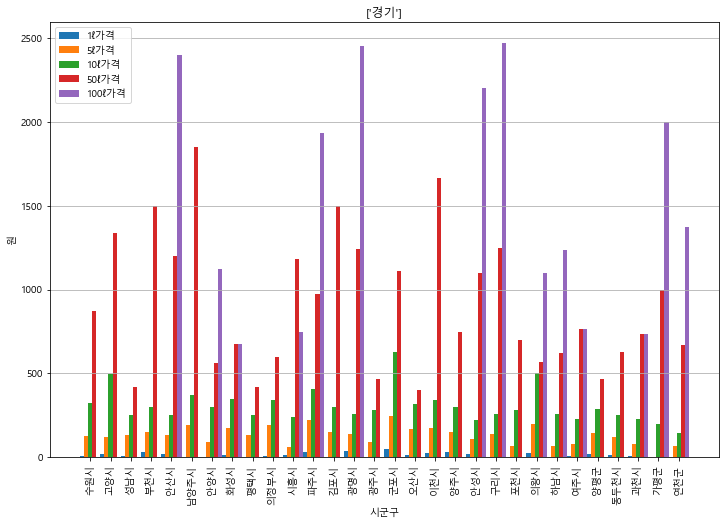

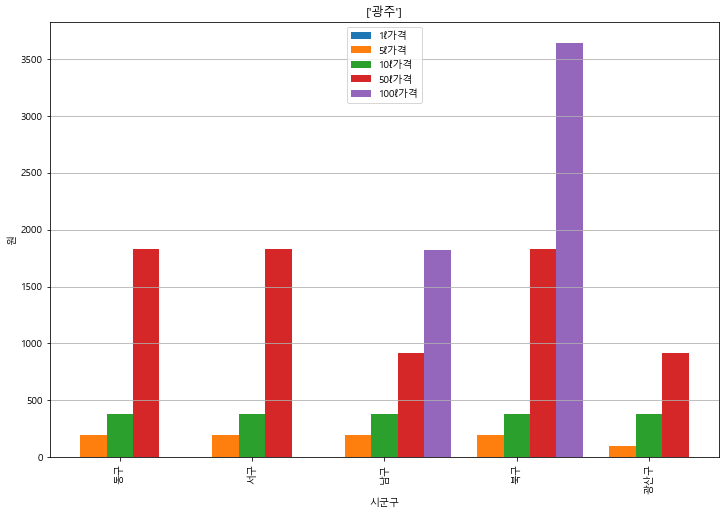

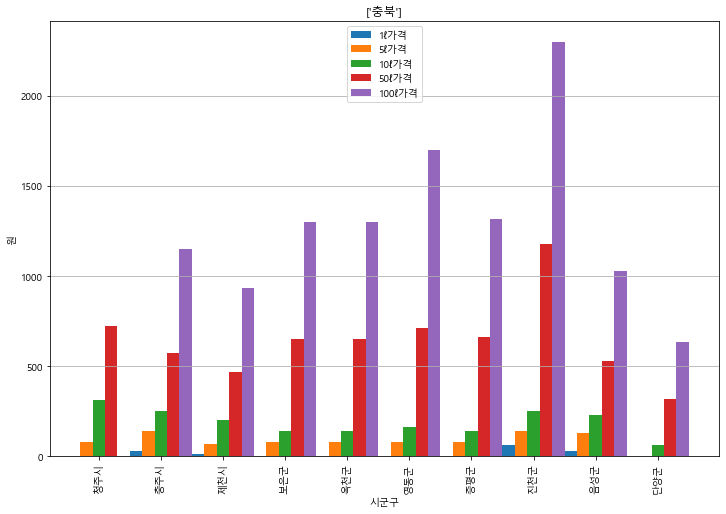

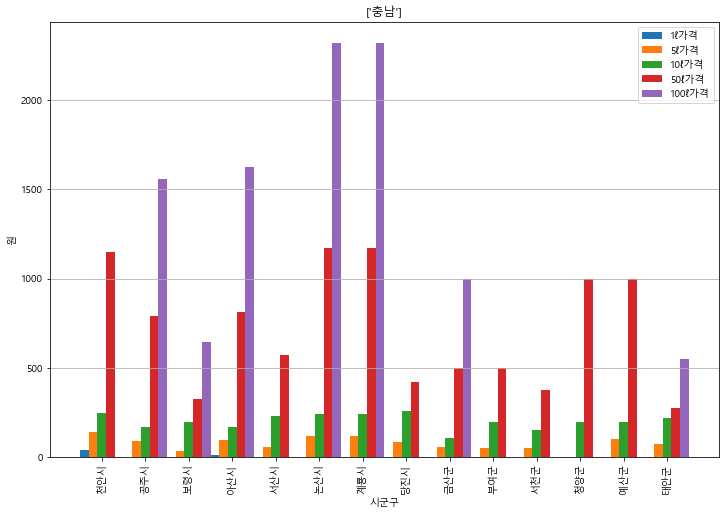

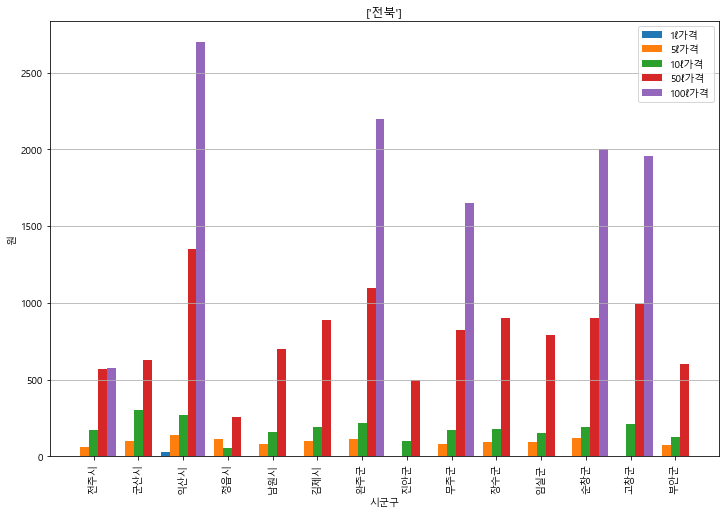

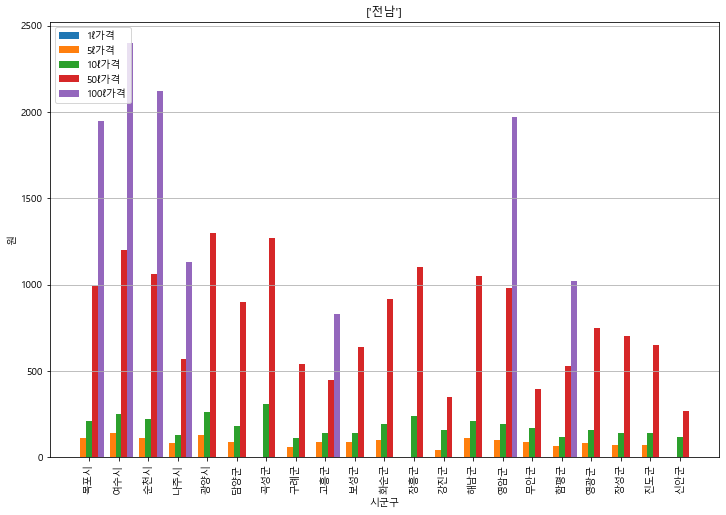

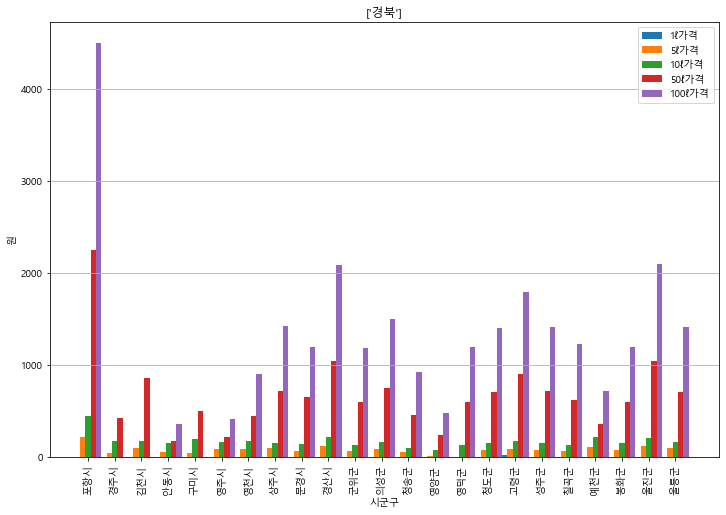

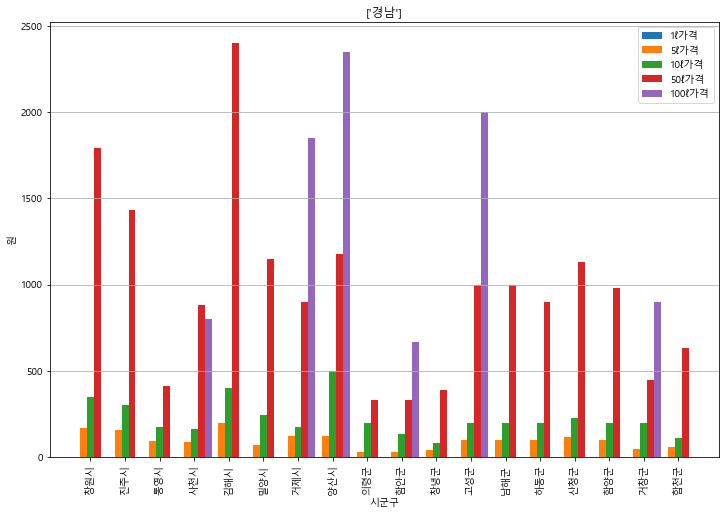

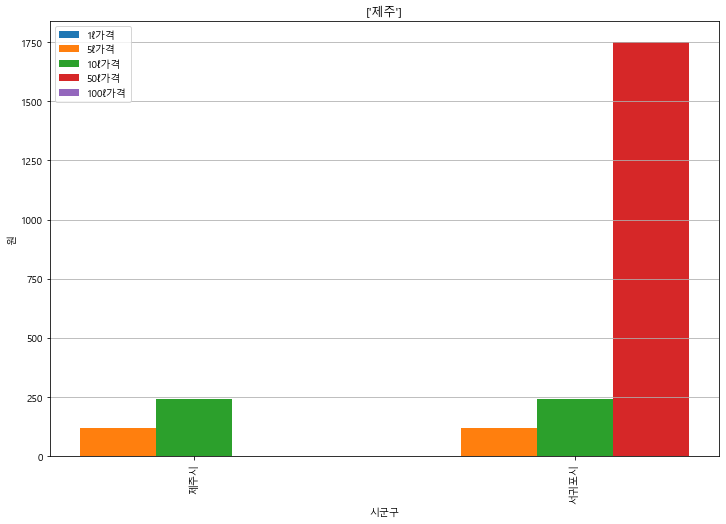

In [48]:
for sido in sidoList:
    x_index=np.arange(len(sido['시군구']))
    bar_width=0.2
    plt.figure(figsize=(12, 8))
    plt.bar(x_index-(bar_width*2),sido['1ℓ가격'],bar_width)
    plt.bar(x_index-(bar_width*1),sido['5ℓ가격'],bar_width)
    plt.bar(x_index,sido['10ℓ가격'],bar_width)
    plt.bar(x_index+(bar_width*1),sido['50ℓ가격'],bar_width)
    plt.bar(x_index+(bar_width*2),sido['100ℓ가격'],bar_width)
    plt.xticks(x_index,sido['시군구'],rotation=90)
    plt.grid(True,axis='y')
    plt.title(sido['시도'].unique())
    plt.ylabel('원')
    plt.xlabel('시군구')
    plt.legend(['1ℓ가격','5ℓ가격','10ℓ가격','50ℓ가격','100ℓ가격'])
    plt.show()

In [49]:
totalData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),예산(천원),1인당발생량(kg),인구밀집도(인구/㎢),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
0,서울,종로구,23.91,161869,17,320.10,27159409,1.98,6769.93,50.00,95.00,150.00,315.00,125.00,245.00,NaN,625.00,940.00,1250.00
1,서울,중구,9.96,136488,15,340.90,11632733,2.50,13703.61,NaN,NaN,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00
2,서울,용산구,21.87,245185,16,285.00,32825500,1.16,11211.02,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33
3,서울,성동구,16.86,308979,17,249.90,39250924,0.81,18326.16,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,NaN,NaN
4,서울,광진구,17.06,366972,15,299.40,36459252,0.82,21510.67,33.33,63.33,130.00,253.33,166.67,326.67,NaN,NaN,NaN,NaN
5,서울,동대문구,14.22,363023,14,395.90,30637744,1.09,25529.04,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,NaN
6,서울,중랑구,18.50,402024,16,319.40,30759407,0.79,21731.03,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,NaN
7,서울,성북구,24.57,454744,20,327.00,9546000,0.72,18508.10,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,NaN,NaN
8,서울,강북구,23.60,317695,13,239.90,31733532,0.76,13461.65,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,NaN
9,서울,노원구,35.44,537303,19,296.00,9091984,0.55,15160.92,NaN,NaN,90.00,130.00,250.00,490.00,NaN,1250.00,1880.00,2500.00


In [50]:
tColumns=totalData.columns
tColumns

Index(['시도', '시군구', '면적(㎢)', '인구(명)', '동(읍·면)수(개소)', '2019발생량(t)', '예산(천원)',
       '1인당발생량(kg)', '인구밀집도(인구/㎢)', '1ℓ가격', '2ℓ가격', '3ℓ가격', '5ℓ가격', '10ℓ가격',
       '20ℓ가격', '30ℓ가격', '50ℓ가격', '75ℓ가격', '100ℓ가격'],
      dtype='object')

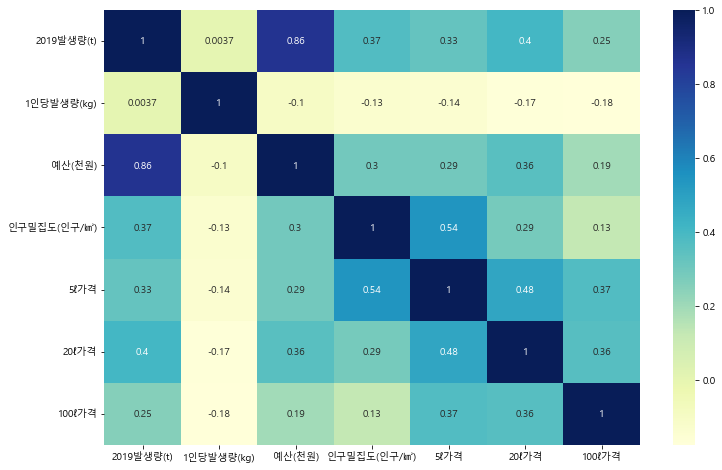

In [51]:
col_list=['2019발생량(t)','1인당발생량(kg)','예산(천원)','인구밀집도(인구/㎢)','5ℓ가격','20ℓ가격','100ℓ가격']
plt.figure(figsize=(12, 8))
sns.heatmap(totalData[col_list].corr(),annot=True,cmap="YlGnBu")
plt.show()

## 결론 : 
## 1인당 발생량이 많다고 봉투가 비싼 것은 아니다.
## 예산- 쓰레기발생량은 연관관계가 있다 
## 봉투가격-예산은 연관관계가 있다 

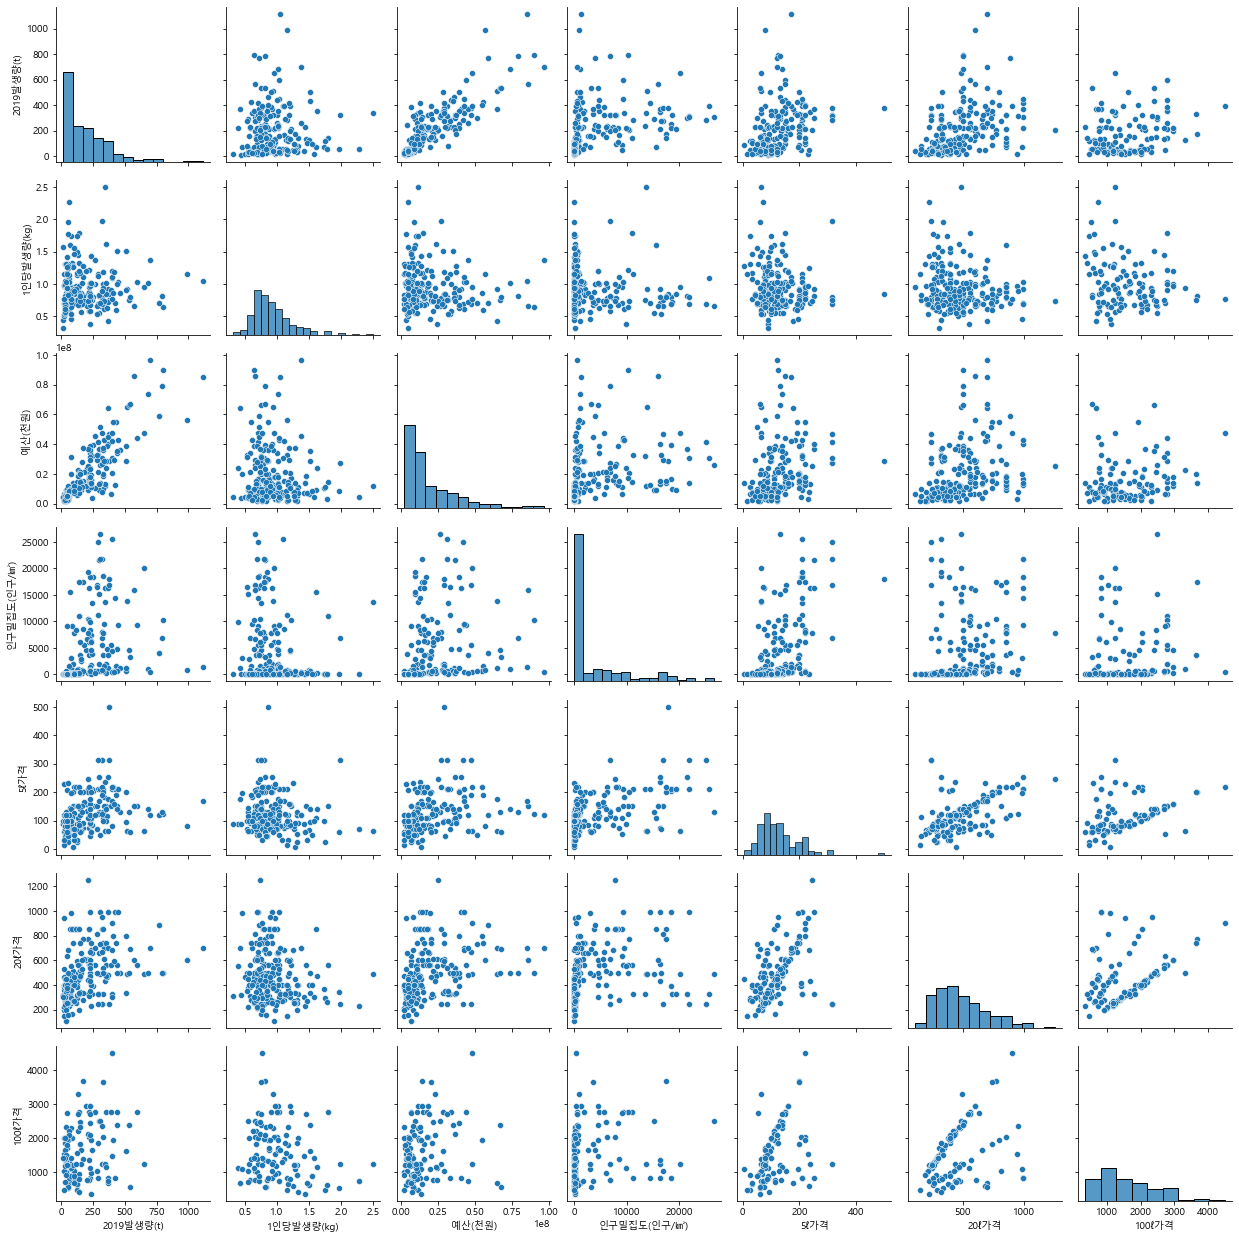

In [66]:
sns.pairplot(totalData[col_list])
plt.show()

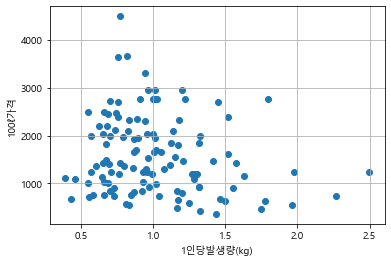

In [53]:
plt.scatter(totalData['1인당발생량(kg)'], totalData['100ℓ가격'])
plt.xlabel('1인당발생량(kg)')
plt.ylabel('100ℓ가격')
plt.grid()
plt.show()

In [54]:
totalData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),예산(천원),1인당발생량(kg),인구밀집도(인구/㎢),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
0,서울,종로구,23.91,161869,17,320.10,27159409,1.98,6769.93,50.00,95.00,150.00,315.00,125.00,245.00,NaN,625.00,940.00,1250.00
1,서울,중구,9.96,136488,15,340.90,11632733,2.50,13703.61,NaN,NaN,90.00,65.00,125.00,490.00,370.00,625.00,940.00,1250.00
2,서울,용산구,21.87,245185,16,285.00,32825500,1.16,11211.02,33.33,63.33,130.00,210.00,500.00,326.67,246.67,416.67,626.67,833.33
3,서울,성동구,16.86,308979,17,249.90,39250924,0.81,18326.16,20.00,38.00,96.00,204.00,200.00,392.00,296.00,500.00,NaN,NaN
4,서울,광진구,17.06,366972,15,299.40,36459252,0.82,21510.67,33.33,63.33,130.00,253.33,166.67,326.67,NaN,NaN,NaN,NaN
5,서울,동대문구,14.22,363023,14,395.90,30637744,1.09,25529.04,33.33,63.33,100.00,210.00,500.00,326.67,246.67,416.67,626.67,NaN
6,서울,중랑구,18.50,402024,16,319.40,30759407,0.79,21731.03,50.00,95.00,150.00,315.00,125.00,245.00,370.00,625.00,940.00,NaN
7,서울,성북구,24.57,454744,20,327.00,9546000,0.72,18508.10,33.33,63.33,100.00,210.00,166.67,326.67,246.67,416.67,NaN,NaN
8,서울,강북구,23.60,317695,13,239.90,31733532,0.76,13461.65,33.33,66.67,100.00,210.00,166.67,326.67,246.67,416.67,626.67,NaN
9,서울,노원구,35.44,537303,19,296.00,9091984,0.55,15160.92,NaN,NaN,90.00,130.00,250.00,490.00,NaN,1250.00,1880.00,2500.00


In [55]:
sidoData

,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),예산(천원),1인당발생량(kg),인구밀집도(인구/㎢),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
시도,,,,,,,,,,,,,,,,,
강원,931.44,79097.65,10.12,95.14,11923828.12,1.37,150.31,13.33,26.04,37.63,91.58,183.43,393.09,242.67,635.78,699.64,1163.01
경기,320.04,419179.77,17.07,288.19,34536635.60,0.73,3546.02,20.32,36.08,56.20,134.67,305.56,590.83,628.65,907.33,1230.15,1514.69
경남,585.58,191004.50,17.11,197.38,16059281.28,1.02,352.90,NaN,NaN,45.33,98.43,226.02,452.87,439.58,960.28,1414.00,1428.33
경북,827.54,118247.91,14.43,102.92,12479023.39,0.98,159.53,20.00,28.33,47.50,86.70,173.91,348.19,482.50,679.13,1051.88,1374.25
광주,100.23,296058.60,19.00,232.04,18004969.00,0.79,3500.63,NaN,NaN,NaN,180.00,380.00,740.00,888.00,1464.00,2184.00,2730.00
대구,110.44,308527.75,17.38,320.99,21242507.12,1.14,6509.38,NaN,NaN,92.86,140.62,271.88,525.00,789.29,1312.50,1931.43,2596.88
대전,111.03,252238.25,14.00,231.93,12408305.25,0.93,2553.67,NaN,NaN,62.50,106.25,330.00,660.00,NaN,1031.25,1653.33,1650.00
부산,49.36,206619.93,12.40,175.33,14905843.40,0.90,9135.51,NaN,NaN,99.44,159.89,389.78,769.11,865.95,1358.00,2020.78,2283.33
서울,24.38,403138.57,17.13,343.83,28839074.43,0.94,17488.43,39.54,80.26,125.52,219.70,349.78,508.35,407.07,579.37,903.14,1333.33


In [56]:
meansidoData=sidoData.mean()
meansidoData

면적(㎢)              419.28
인구(명)           237321.29
동(읍·면)수(개소)         15.58
2019발생량(t)         222.02
예산(천원)        21613238.16
1인당발생량(kg)           0.98
인구밀집도(인구/㎢)       3311.72
1ℓ가격                26.41
2ℓ가격                45.69
3ℓ가격                65.14
5ℓ가격               123.60
10ℓ가격              262.16
20ℓ가격              516.91
30ℓ가격              609.69
50ℓ가격             1012.07
75ℓ가격             1327.55
100ℓ가격            1752.47
dtype: float64

In [57]:
meanvinylData=sidoData[vinylColumn]
meanvinylData

,1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
시도,,,,,,,,,,
강원,13.33,26.04,37.63,91.58,183.43,393.09,242.67,635.78,699.64,1163.01
경기,20.32,36.08,56.20,134.67,305.56,590.83,628.65,907.33,1230.15,1514.69
경남,NaN,NaN,45.33,98.43,226.02,452.87,439.58,960.28,1414.00,1428.33
경북,20.00,28.33,47.50,86.70,173.91,348.19,482.50,679.13,1051.88,1374.25
광주,NaN,NaN,NaN,180.00,380.00,740.00,888.00,1464.00,2184.00,2730.00
대구,NaN,NaN,92.86,140.62,271.88,525.00,789.29,1312.50,1931.43,2596.88
대전,NaN,NaN,62.50,106.25,330.00,660.00,NaN,1031.25,1653.33,1650.00
부산,NaN,NaN,99.44,159.89,389.78,769.11,865.95,1358.00,2020.78,2283.33
서울,39.54,80.26,125.52,219.70,349.78,508.35,407.07,579.37,903.14,1333.33


In [58]:
meanvinylData.max()

1ℓ가격       40.00
2ℓ가격       80.26
3ℓ가격      125.52
5ℓ가격      219.70
10ℓ가격     389.78
20ℓ가격     769.11
30ℓ가격    1050.00
50ℓ가격    1750.00
75ℓ가격    2184.00
100ℓ가격   2730.00
dtype: float64

In [59]:
meanvinylDataindex=meanvinylData.index
meanvinylDataindex

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='시도')

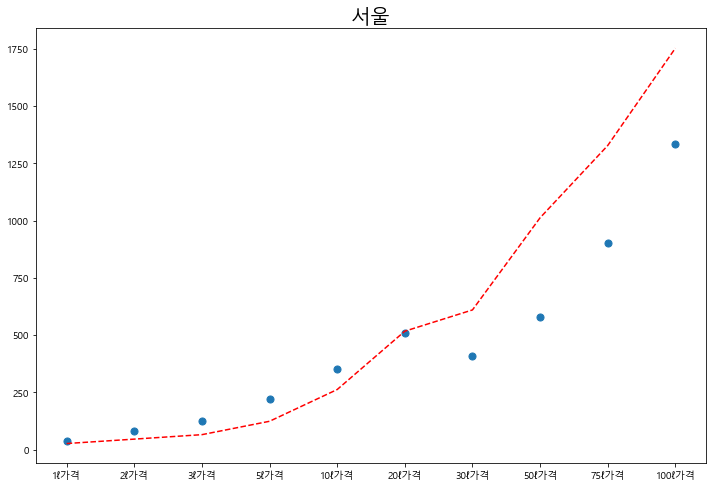

In [60]:
plt.figure(figsize=(12, 8))
plt.scatter(vinylColumn,meanvinylData.loc['서울'],s=50)
plt.plot(vinylColumn, meansidoData[vinylColumn], 'r--')
plt.title('서울',fontsize=20)
plt.show()

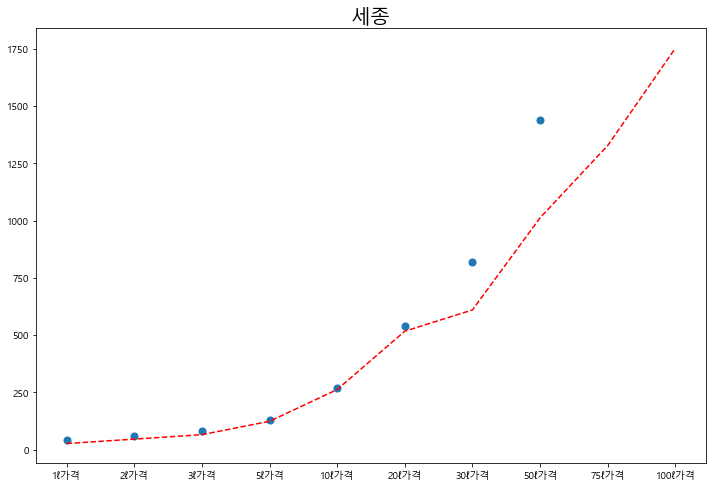

In [61]:
plt.figure(figsize=(12, 8))
plt.scatter(vinylColumn,meanvinylData.loc['세종'],s=50)
plt.plot(vinylColumn, meansidoData[vinylColumn], 'r--')
plt.title('세종',fontsize=20)
plt.show()

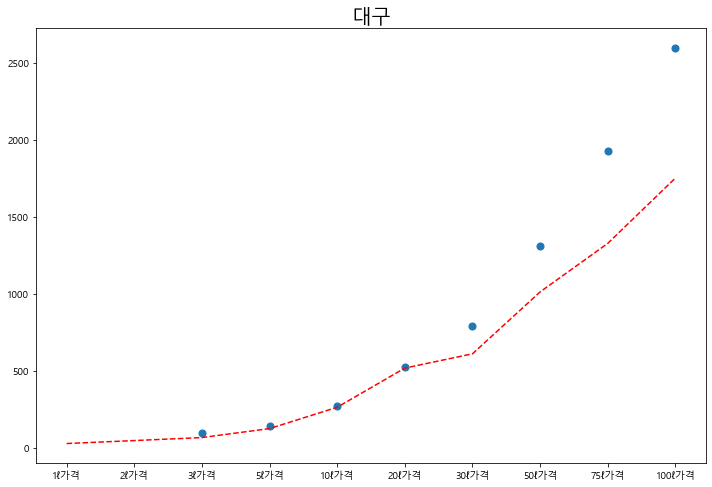

In [62]:
plt.figure(figsize=(12, 8))
plt.scatter(vinylColumn,meanvinylData.loc['대구'],s=50)
plt.plot(vinylColumn, meansidoData[vinylColumn], 'r--')
plt.title('대구',fontsize=20)
plt.show()

In [63]:
daeguData

,시도,시군구,면적(㎢),인구(명),동(읍·면)수(개소),2019발생량(t),총계,1인당발생량(kg),인구밀집도(인구/㎢),1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
38,대구,중구,7.06,78219,12,140.20,14482387,1.79,11079.18,NaN,NaN,100.00,150.00,290.00,560.00,850.00,1400.00,2080.00,2770.00
39,대구,동구,182.14,347376,20,352.40,28388396,1.01,1907.19,NaN,NaN,100.00,150.00,290.00,560.00,850.00,1400.00,NaN,2770.00
40,대구,서구,17.33,177758,17,217.20,17270142,1.22,10257.24,NaN,NaN,100.00,150.00,290.00,560.00,850.00,1400.00,2080.00,2770.00
41,대구,남구,17.43,149660,13,166.70,15152168,1.11,8586.35,NaN,NaN,50.00,75.00,145.00,280.00,425.00,700.00,1040.00,1385.00
42,대구,북구,93.98,442943,23,441.10,33782917,1.00,4713.16,NaN,NaN,100.00,150.00,290.00,560.00,850.00,1400.00,2080.00,2770.00
43,대구,수성구,76.53,430334,23,389.90,6399060,0.91,5623.08,NaN,NaN,100.00,150.00,290.00,560.00,NaN,1400.00,2080.00,2770.00
44,대구,달서구,62.34,579352,22,595.80,43892987,1.03,9293.42,NaN,NaN,100.00,150.00,290.00,560.00,850.00,1400.00,2080.00,2770.00
45,대구,달성군,426.68,262580,9,264.60,10572000,1.01,615.40,NaN,NaN,NaN,150.00,290.00,560.00,850.00,1400.00,2080.00,2770.00


In [64]:
vinyldaeguData=daeguData[vinylColumn]
vinyldaeguData.index=daeguData['시군구']
vinyldaeguData

,1ℓ가격,2ℓ가격,3ℓ가격,5ℓ가격,10ℓ가격,20ℓ가격,30ℓ가격,50ℓ가격,75ℓ가격,100ℓ가격
시군구,,,,,,,,,,
중구,NaN,NaN,100.00,150.00,290.00,560.00,850.00,1400.00,2080.00,2770.00
동구,NaN,NaN,100.00,150.00,290.00,560.00,850.00,1400.00,NaN,2770.00
서구,NaN,NaN,100.00,150.00,290.00,560.00,850.00,1400.00,2080.00,2770.00
남구,NaN,NaN,50.00,75.00,145.00,280.00,425.00,700.00,1040.00,1385.00
북구,NaN,NaN,100.00,150.00,290.00,560.00,850.00,1400.00,2080.00,2770.00
수성구,NaN,NaN,100.00,150.00,290.00,560.00,NaN,1400.00,2080.00,2770.00
달서구,NaN,NaN,100.00,150.00,290.00,560.00,850.00,1400.00,2080.00,2770.00
달성군,NaN,NaN,NaN,150.00,290.00,560.00,850.00,1400.00,2080.00,2770.00


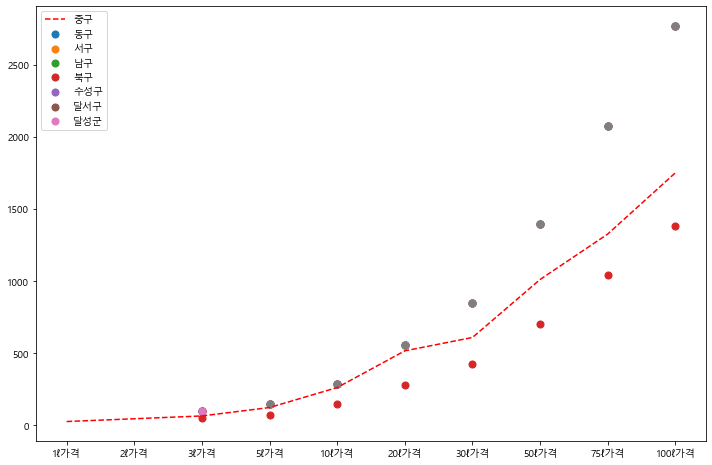

In [65]:
plt.figure(figsize=(12, 8))
for gu in vinyldaeguData.index:
    plt.scatter(vinylColumn,vinyldaeguData.loc[gu],s=50)
plt.plot(vinylColumn, meansidoData[vinylColumn], 'r--')
plt.legend(vinyldaeguData.index)
plt.show()